# SOM

In [1]:
from numbasom import *

In [2]:
import numpy as np
data = np.random.random([200,3])

In [3]:
som = SOM(som_size=(50,50), is_torus=False)

In [4]:
lattice = som.train(data, num_iterations=15000)

SOM training took: 1.952066 seconds.


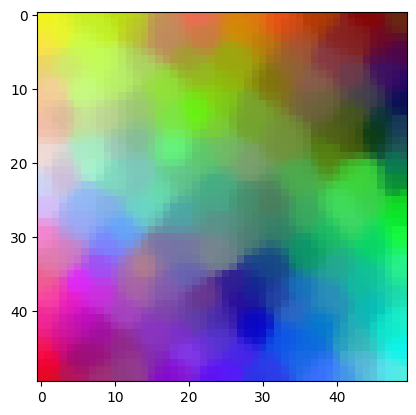

In [6]:
import matplotlib.pyplot as plt

plt.imshow(lattice)
plt.show()

In [7]:
um = u_matrix(lattice)

In [8]:
um.shape

(50, 50)

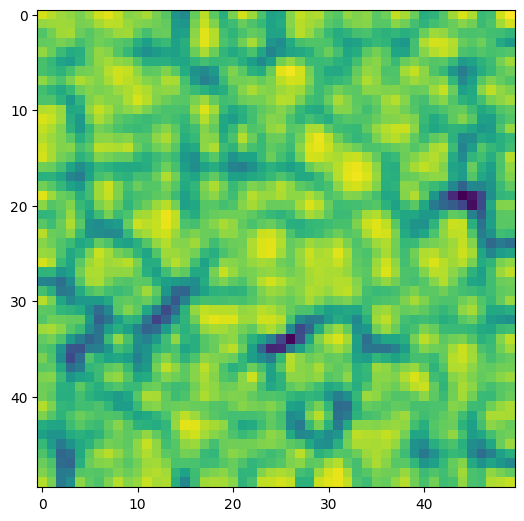

In [9]:
plot_u_matrix(um, fig_size=(6.2,6.2))

In [10]:
colors = np.array([[1.,0.,0.],[0.,1.,0.],[0.,0.,1.],[1.,1.,0.],[0.,1.,1.],[1.,0.,1.],[0.,0.,0.],[1.,1.,1.]])
color_labels = ['red', 'green', 'blue', 'yellow', 'cyan', 'purple','black', 'white']

In [11]:
projection = project_on_lattice(colors, lattice, additional_list=color_labels)

for p in projection:
    if projection[p]:
        print (p, projection[p][0])

Projecting on SOM took: 0.346581 seconds.
(0, 0) yellow
(16, 45) black
(19, 0) white
(27, 49) green
(37, 5) purple
(44, 29) blue
(45, 49) cyan
(49, 0) red


In [12]:
closest = lattice_closest_vectors(colors, lattice, additional_list=color_labels)

Finding closest data points took: 0.127542 seconds.


In [13]:
closest[(1,1)]

['yellow']

In [14]:
closest_vec = lattice_closest_vectors(colors, lattice)

Finding closest data points took: 0.003187 seconds.


In [17]:
values = np.array(list(closest_vec.values())).reshape(50,50,-1)
values

array([[[1., 1., 0.],
        [1., 1., 0.],
        [1., 1., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[1., 1., 0.],
        [1., 1., 0.],
        [1., 1., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[1., 1., 0.],
        [1., 1., 0.],
        [1., 1., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        ...,
        [0., 1., 1.],
        [0., 1., 1.],
        [0., 1., 1.]],

       [[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        ...,
        [0., 1., 1.],
        [0., 1., 1.],
        [0., 1., 1.]],

       [[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        ...,
        [0., 1., 1.],
        [0., 1., 1.],
        [0., 1., 1.]]])

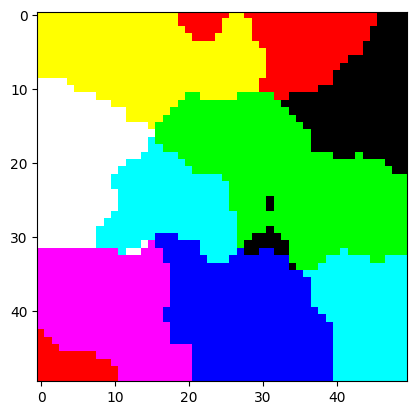

In [18]:
plt.imshow(values)
plt.show()

In [19]:
activations = lattice_activations(colors, lattice)

Computing SOM activations took: 0.374525 seconds.


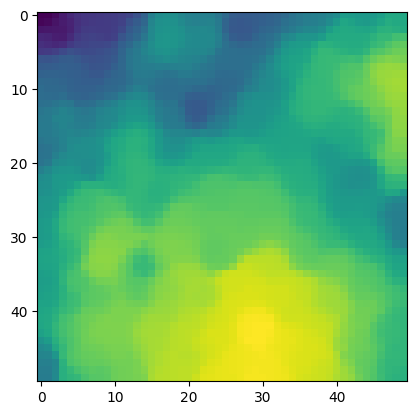

In [20]:
plt.imshow(activations[2])
plt.show()

In [21]:
activations = lattice_activations(colors, lattice, exponent=8)

Computing SOM activations took: 0.001178 seconds.


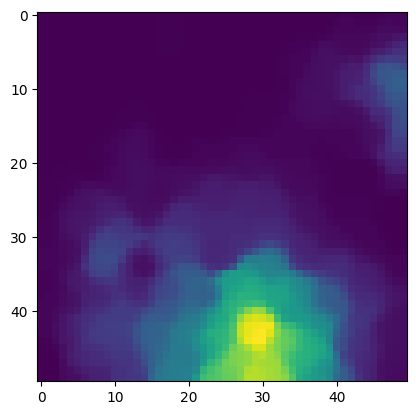

In [22]:
plt.imshow(activations[2])
plt.show()

# KMeans

In [182]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import random
import folium as fl
from folium.plugins import MarkerCluster
import matplotlib.pyplot as plt
import seaborn

In [36]:
path = '/Users/davidschildberger/code/dadavie/planetary_garden/raw_data/'

In [37]:
filen = 'world_history_bioclim_allLatLon.npy'

In [38]:
cl_data = np.load(path+filen, allow_pickle=True)

In [131]:
cl_data.shape

(121, 67420, 22)

In [135]:
dd = pd.DataFrame(cl_data[0])
dd.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0,12,284,-20.191667556762695,7.716667175292969,0.18242712318897247,42.29999923706055,-39.10000228881836,12.749866485595703,3.6000001430511475,...,0.0,222.05648803710938,-33.766666412353516,-6.100000381469727,10.0,6.0,10.0,0.0,-6.100000381469727,-33.766666412353516
1,0,12,285,-20.174999237060547,7.708333492279053,0.1822301149368286,42.29999923706055,-39.20000076293945,12.782353401184082,3.6000001430511475,...,0.0,222.05648803710938,-33.733333587646484,-5.966667175292969,10.0,6.0,10.0,0.0,-5.966667175292969,-33.733333587646484
2,0,12,286,-20.76666831970215,8.125,0.1889534890651703,43.0,-40.70000076293945,13.210182189941406,3.299999952316284,...,0.10000000149011612,1.556375173095148e-05,-34.79999923706055,-5.733333587646484,1.2000001668930054,0.10000000149011612,0.30000001192092896,0.30000001192092896,-5.733333587646484,-34.79999923706055
3,0,12,287,-20.483333587646484,8.116665840148926,0.18919965624809265,42.900001525878906,-40.400001525878906,13.226415634155273,3.6000001430511475,...,0.10000000149011612,1.556375173095148e-05,-34.5,-5.400000095367432,1.2000001668930054,0.10000000149011612,0.30000001192092896,0.30000001192092896,-5.400000095367432,-34.5
4,0,12,288,-21.241666793823242,8.108333587646484,0.18682795763015747,43.400001525878906,-41.29999923706055,13.338006973266602,3.0,...,0.10000000149011612,1.556375173095148e-05,-35.33333206176758,-6.0,1.2000001668930054,0.10000000149011612,0.30000001192092896,0.30000001192092896,-6.0,-35.33333206176758


In [136]:
dd = dd.astype(float)
dd.dropna(inplace=True)
dd.reset_index(inplace=True, drop=True)
sel_data = dd.iloc[:,3:]

## Train / Model - one year

In [276]:
# Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(sel_data)
# Initialize K-Means
num_clusters = 100
kmeans = KMeans(
    init="random",
    n_clusters=num_clusters,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [277]:
%%time
kmeans.fit(scaled_data)

CPU times: user 53.7 s, sys: 1.72 s, total: 55.4 s
Wall time: 3.65 s


KMeans(init='random', n_clusters=100, random_state=42)

In [278]:
dd['Cluster_No'] = kmeans.labels_

In [279]:
sel_data.head()

,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,-20.191668,7.716667,0.182427,42.299999,-39.100002,12.749866,3.6,0.0,10.0,0.0,222.056488,-33.766666,-6.100000,10.0,6.0,10.0,0.0,-6.100000,-33.766666
1,-20.174999,7.708333,0.182230,42.299999,-39.200001,12.782353,3.6,0.0,10.0,0.0,222.056488,-33.733334,-5.966667,10.0,6.0,10.0,0.0,-5.966667,-33.733334
2,-20.766668,8.125000,0.188953,43.000000,-40.700001,13.210182,3.3,0.3,0.3,0.1,0.000016,-34.799999,-5.733334,1.2,0.1,0.3,0.3,-5.733334,-34.799999
3,-20.483334,8.116666,0.189200,42.900002,-40.400002,13.226416,3.6,0.3,0.3,0.1,0.000016,-34.500000,-5.400000,1.2,0.1,0.3,0.3,-5.400000,-34.500000
4,-21.241667,8.108334,0.186828,43.400002,-41.299999,13.338007,3.0,0.3,0.3,0.1,0.000016,-35.333332,-6.000000,1.2,0.1,0.3,0.3,-6.000000,-35.333332


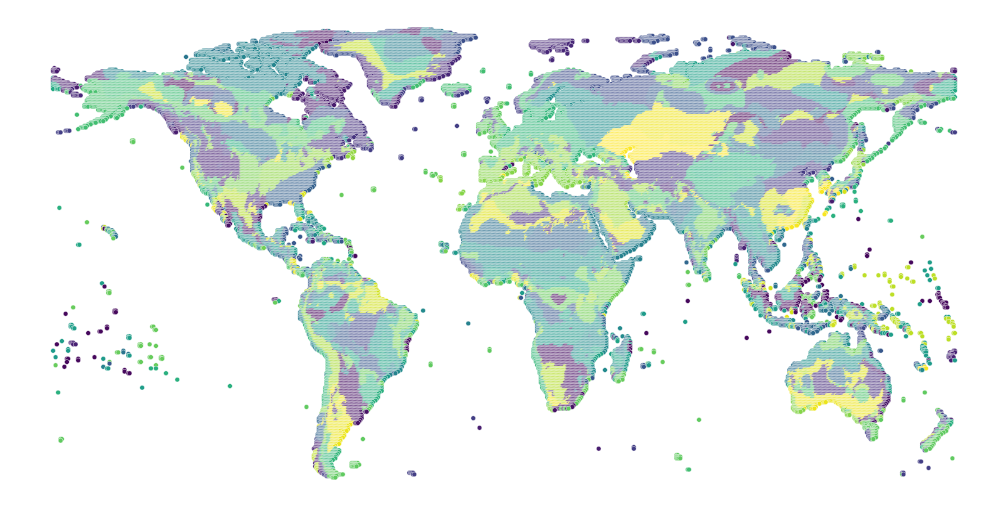

In [280]:
plt.figure(figsize=(16, 8), dpi=80)
g = seaborn.scatterplot(data=dd,  x=2, y=1, hue='Cluster_No', legend=False, palette="viridis", size=0.01)
g.invert_yaxis()

# Hide the right and top spines
g.spines.right.set_visible(False)
g.spines.top.set_visible(False)
g.spines.left.set_visible(False)
g.spines.bottom.set_visible(False)
g.set(xlabel=None)
g.set(ylabel=None)
g.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)
plt.show()

## Predict

In [262]:
filename = 'data_inkl_bioclim_grs.csv'
df = pd.read_csv(path+filename)

In [263]:
samples = df.sample(n = 5)

In [264]:
samples

,Unnamed: 0,index,gbifID,datasetKey,kingdom,phylum,class,order,family,genus,...,b10,b11,b12,b13,b14,b15,b16,b17,b18,b19
73873,74684,75712,1259064780,7bd65a7a-f762-11e1-a439-00145eb45e9a,Plantae,Tracheophyta,Liliopsida,Alismatales,Araceae,Anthurium,...,8.1,107.164299,21.233335,24.866669,786.600037,241.900009,96.700005,128.199997,23.233332,22.566668
224307,229871,233158,2515716123,15f819bd-6612-4447-854b-14d12ee1022d,Plantae,Tracheophyta,Magnoliopsida,Santalales,Loranthaceae,Lepeostegeres,...,228.5,26.354450,26.200003,27.533333,3662.599854,335.500000,873.500000,907.100037,26.200003,27.533333
228170,233763,237080,1259062958,7bd65a7a-f762-11e1-a439-00145eb45e9a,Plantae,Tracheophyta,Magnoliopsida,Lamiales,Scrophulariaceae,Buddleja,...,2.7,94.442520,8.900001,13.500000,492.700012,123.599998,133.100006,55.100002,13.300000,9.433333
189844,194377,197188,686824512,dce00a1f-f6b4-4e11-9771-92c62c40ad80,Animalia,Chordata,Amphibia,Anura,Leptodactylidae,Engystomops,...,14.0,56.585278,15.333333,15.333333,1482.400024,189.800003,206.300003,387.500000,15.366668,15.566667
10359,10503,10665,2513355231,15f819bd-6612-4447-854b-14d12ee1022d,Plantae,Tracheophyta,Magnoliopsida,Apiales,Araliaceae,Aralia,...,30.5,77.447578,26.100000,26.100000,2320.499756,482.899994,618.400024,119.900002,25.666666,26.100000


In [265]:
sel_pred_sc = scaler.transform(samples.iloc[:, 19:].values)
kmeans.predict(sel_pred_sc)

array([5, 8, 0, 5, 3], dtype=int32)

## Train / Model - history

In [281]:
cl_data.shape

(121, 67420, 22)

In [288]:
cl_data_fl = cl_data.reshape(-1, cl_data.shape[-1])

In [290]:
cl_data_fl.shape

(8157820, 22)

In [293]:
dd = pd.DataFrame(cl_data_fl)
dd.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0,12,284,-20.191667556762695,7.716667175292969,0.18242712318897247,42.29999923706055,-39.10000228881836,12.749866485595703,3.6000001430511475,...,0.0,222.05648803710938,-33.766666412353516,-6.100000381469727,10.0,6.0,10.0,0.0,-6.100000381469727,-33.766666412353516
1,0,12,285,-20.174999237060547,7.708333492279053,0.1822301149368286,42.29999923706055,-39.20000076293945,12.782353401184082,3.6000001430511475,...,0.0,222.05648803710938,-33.733333587646484,-5.966667175292969,10.0,6.0,10.0,0.0,-5.966667175292969,-33.733333587646484
2,0,12,286,-20.76666831970215,8.125,0.1889534890651703,43.0,-40.70000076293945,13.210182189941406,3.299999952316284,...,0.10000000149011612,1.556375173095148e-05,-34.79999923706055,-5.733333587646484,1.2000001668930054,0.10000000149011612,0.30000001192092896,0.30000001192092896,-5.733333587646484,-34.79999923706055
3,0,12,287,-20.483333587646484,8.116665840148926,0.18919965624809265,42.900001525878906,-40.400001525878906,13.226415634155273,3.6000001430511475,...,0.10000000149011612,1.556375173095148e-05,-34.5,-5.400000095367432,1.2000001668930054,0.10000000149011612,0.30000001192092896,0.30000001192092896,-5.400000095367432,-34.5
4,0,12,288,-21.241666793823242,8.108333587646484,0.18682795763015747,43.400001525878906,-41.29999923706055,13.338006973266602,3.0,...,0.10000000149011612,1.556375173095148e-05,-35.33333206176758,-6.0,1.2000001668930054,0.10000000149011612,0.30000001192092896,0.30000001192092896,-6.0,-35.33333206176758


In [294]:
dd = dd.astype(float)
dd.dropna(inplace=True)
dd.reset_index(inplace=True, drop=True)
sel_data = dd.iloc[:,3:]

In [295]:
# Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(sel_data)
# Initialize K-Means
num_clusters = 100
kmeans = KMeans(
    init="random",
    n_clusters=num_clusters,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [297]:
%%time
kmeans.fit(sel_data)

CPU times: user 3h 53min 54s, sys: 1min 59s, total: 3h 55min 54s
Wall time: 15min 38s


KMeans(init='random', n_clusters=100, random_state=42)